<a href="https://colab.research.google.com/github/voshna123/tensorflow_practice/blob/main/tf_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tf_keras
import tensorflow as tf
import pandas as pd
import numpy as np

In [3]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/helper_functions.py

--2025-01-07 05:23:20--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2025-01-07 05:23:20 (109 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [4]:
from helper_functions import create_tensorboard_callback,plot_loss_curves, unzip_data,walk_through_dir

In [5]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2025-01-07 05:23:20--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.207, 74.125.130.207, 74.125.68.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M  18.7MB/s    in 9.4s    

2025-01-07 05:23:30 (17.1 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [6]:
unzip_data("/content/10_food_classes_10_percent.zip")

In [7]:
walk_through_dir("/content/10_food_classes_10_percent")

There are 2 directories and 0 images in '/content/10_food_classes_10_percent'.
There are 10 directories and 0 images in '/content/10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '/content/10_food_classe

In [8]:
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [9]:
IMG_SIZE = (224,224)

In [25]:
train_data_10perc =tf.keras.preprocessing.image_dataset_from_directory(
    directory=train_dir,
    image_size=IMG_SIZE,
    label_mode="categorical",
    seed=42
)

test_data_10perc = tf.keras.preprocessing.image_dataset_from_directory(
    directory=test_dir,
    image_size=IMG_SIZE,
    label_mode="categorical",
)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [11]:
train_data_10perc.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [12]:
for img, label in train_data_10perc.take(1):
  print(img, label)

tf.Tensor(
[[[[1.10000000e+02 6.32397957e+01 0.00000000e+00]
   [1.18780609e+02 7.49744949e+01 7.37755108e+00]
   [1.06168365e+02 6.54438782e+01 1.02551079e+00]
   ...
   [9.51429443e+01 5.70000000e+01 2.21426392e+00]
   [1.04714348e+02 6.15000267e+01 8.57146740e+00]
   [1.10357109e+02 6.33571091e+01 9.35710812e+00]]

  [[1.14693878e+02 7.08877563e+01 4.36224604e+00]
   [1.14423470e+02 7.30051041e+01 7.14285660e+00]
   [1.10346939e+02 7.12346954e+01 6.29081631e+00]
   ...
   [9.44694366e+01 5.59285736e+01 1.34179497e+00]
   [1.00285751e+02 5.70714264e+01 4.14286995e+00]
   [1.07311264e+02 5.74490089e+01 4.40309334e+00]]

  [[1.07239792e+02 6.82346954e+01 7.65306503e-02]
   [1.13382652e+02 7.48112259e+01 7.59694004e+00]
   [1.13469383e+02 7.48520432e+01 9.94387722e+00]
   ...
   [9.81888351e+01 5.96173630e+01 5.04589176e+00]
   [1.02857155e+02 5.68571548e+01 4.85715580e+00]
   [1.09576607e+02 5.95766068e+01 6.57660770e+00]]

  ...

  [[9.08060455e+01 6.93775177e+01 2.37751961e+00]
   [9

## Model 1

In [32]:
dir_name = "exp"

In [29]:
base_model =tf.keras.applications.EfficientNetB0(include_top = False)

base_model.trainable = False

In [30]:
inputs = tf.keras.layers.Input(shape = (224,224,3), name = 'input_layer')

# for resnet50v2
#x = tf_keras.layers.Rescaling(1./255)(inputs)

x = base_model(inputs)

print(f"Shape after base model: {x.shape}")

x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x)
print(f"Shape after Global Average Pooling: {x.shape}")

outputs = tf.keras.layers.Dense(10, activation = "softmax", name = "output_layer")(x)

model_1 = tf.keras.Model(inputs, outputs)

model_1.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [31]:
base_hist = model_1.fit(train_data_10perc,
                        epochs = 5,
                        validation_data =test_data_10perc,
                        callbacks =[create_tensorboard_callback("exp", "base")])

Saving TensorBoard log files to: exp/base/20250107-053112
Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.2008 - loss: 2.1976 - val_accuracy: 0.6816 - val_loss: 1.4032
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 39s 309ms/step - accuracy: 0.6964 - loss: 1.2977 - val_accuracy: 0.7792 - val_loss: 0.9705
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 268ms/step - accuracy: 0.7864 - loss: 0.9311 - val_accuracy: 0.8060 - val_loss: 0.7947
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 270ms/step - accuracy: 0.8384 - loss: 0.7316 - val_accuracy: 0.8216 - val_loss: 0.7015
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 313ms/step - accuracy: 0.8761 - loss: 0.6104 - val_accuracy: 0.8256 - val_loss: 0.6467


In [33]:
model_1.evaluate(test_data_10perc)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.8333 - loss: 0.6399


[0.6467081308364868, 0.8256000280380249]

In [36]:
df = pd.DataFrame(base_hist.history)
df

,accuracy,loss,val_accuracy,val_loss
0,0.334667,1.973686,0.6816,1.403206
1,0.704000,1.219480,0.7792,0.970455
2,0.789333,0.890617,0.8060,0.794711
3,0.832000,0.726770,0.8216,0.701519
4,0.865333,0.623894,0.8256,0.646708


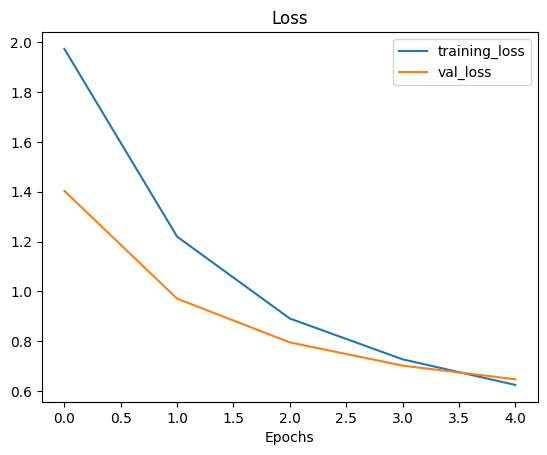

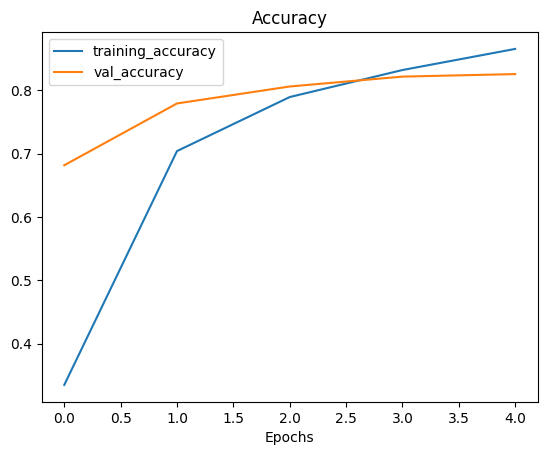

In [37]:
plot_loss_curves(base_hist)

In [38]:
model_1.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, 7, 7, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling_layer         │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │          12,810 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,088,003 (15.59 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

 Optimizer params: 25,622 (100.09 KB)

## Model 2 (1% perc data)

In [39]:
# loading in 1 perc data

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

--2025-01-07 05:50:16--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.118.207, 74.125.200.207, 74.125.130.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.118.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  18.9MB/s    in 7.7s    

2025-01-07 05:50:24 (16.5 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [40]:
unzip_data("/content/10_food_classes_1_percent.zip")

In [41]:
train_dir_1_perc = "10_food_classes_1_percent/train"
test_dir_1_perc = "10_food_classes_1_percent/test"

In [42]:
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There a

In [43]:
train_data_1_perc = tf.keras.preprocessing.image_dataset_from_directory(
    directory=train_dir_1_perc,
    image_size=IMG_SIZE,
    label_mode="categorical",
    seed=42,
    shuffle = True,
    batch_size = 32
)

test_data_1_perc = tf.keras.preprocessing.image_dataset_from_directory(
    directory=test_dir_1_perc,
    image_size=IMG_SIZE,
    label_mode="categorical",
    seed=42,
    shuffle = False,
    batch_size = 32
)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


## Adding data augmentation

In [86]:
data_augment = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomHeight(0.2),
], name = "data_augment")

## Visualising augemented images

In [55]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

array([[[ 21,  28,  38],
        [ 22,  29,  39],
        [ 21,  28,  38],
        ...,
        [ 71,  74,  57],
        [ 70,  73,  56],
        [ 69,  72,  55]],

       [[ 21,  28,  38],
        [ 21,  28,  38],
        [ 22,  29,  39],
        ...,
        [ 83,  86,  69],
        [ 82,  85,  68],
        [ 81,  84,  67]],

       [[ 22,  29,  39],
        [ 22,  29,  39],
        [ 22,  29,  39],
        ...,
        [ 84,  87,  70],
        [ 80,  83,  66],
        [ 76,  79,  62]],

       ...,

       [[248, 254, 250],
        [248, 254, 250],
        [248, 254, 250],
        ...,
        [158, 155, 122],
        [156, 156, 122],
        [156, 156, 122]],

       [[246, 255, 250],
        [246, 255, 250],
        [248, 254, 250],
        ...,
        [158, 155, 122],
        [153, 153, 119],
        [152, 152, 118]],

       [[246, 255, 250],
        [246, 255, 250],
        [248, 254, 250],
        ...,
        [159, 156, 123],
        [153, 153, 119],
        [150, 150, 116]]], dtype=uint8)
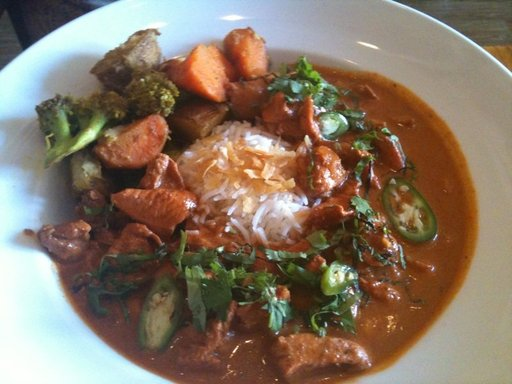

In [57]:
img = mpimg.imread("10_food_classes_1_percent/test/chicken_curry/101833.jpg")
img

In [60]:
augmented = data_augment(tf.expand_dims(tf.constant(img), axis = 0))

(-0.5, 511.5, 457.5, -0.5)

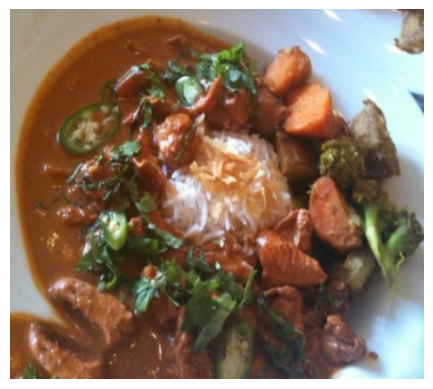

In [62]:
plt.imshow(augmented[0])
plt.axis("off")

In [87]:
base = tf.keras.applications.EfficientNetB0(include_top = False)
base.trainable = False

input = tf.keras.layers.Input(shape = (224,224,3), name = "input_layer")

x = data_augment(input)

x = base(x, training = False)

x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling")(x)

output = tf.keras.layers.Dense(10, activation = "softmax", name = "output_layer")(x)

model_2 = tf.keras.Model(input, output)

model_2.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [88]:
aug_hist_1_perc = model_2.fit(train_data_1_perc,
                              epochs = 5,
                              validation_data = test_data_1_perc,
                              callbacks=[create_tensorboard_callback("exp", "augmented_1_perc")])

Saving TensorBoard log files to: exp/augmented_1_perc/20250107-064524
Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 25s 7s/step - accuracy: 0.1235 - loss: 2.3138 - val_accuracy: 0.1704 - val_loss: 2.2569
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 5s/step - accuracy: 0.3856 - loss: 2.1347 - val_accuracy: 0.2296 - val_loss: 2.1491
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step - accuracy: 0.3095 - loss: 1.9881 - val_accuracy: 0.2736 - val_loss: 2.0570
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.4317 - loss: 1.8407 - val_accuracy: 0.3336 - val_loss: 1.9739
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step - accuracy: 0.5377 - loss: 1.7295 - val_accuracy: 0.3840 - val_loss: 1.8987


In [74]:
model_2.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ data_augment (Sequential)            │ (None, None, 224, 3)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, None, 7, 1280)       │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling               │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │          12,810 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,088,003 (15.59 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

 Optimizer params: 25,622 (100.09 KB)

## Model 3 with data augment and 10 perc data

In [89]:
tf.random.set_seed(42)

base = tf.keras.applications.EfficientNetB0(include_top = False)
base.trainable = False

input = tf.keras.layers.Input(shape = (224,224,3), name = "input_layer")

x = data_augment(input)

x = base(x, training = False)

x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling")(x)

output = tf.keras.layers.Dense(10, activation = "softmax", name = "output_layer")(x)

model_3 = tf.keras.Model(input,output)

model_3.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [ ]:
aug_hist_10_perc = model_3.fit(train_data_10perc,
            epochs = 5,
            validation_data = test_data_10perc,
            callbacks = [create_tensorboard_callback("exp", "augmented_10_perc")])

Saving TensorBoard log files to: exp/augmented_10_perc/20250107-064724
